In [1]:
import matplotlib.pyplot as plt
plt.style.use('../styles/gcpeixoto-book.mplstyle')

(cap:operacoes)=
# Operações

<div class="chapter-thumb">
    <div class="chapter-oa">
        <h2>Objetivos de aprendizagem</h2>
        <ul>
        <li>Interpretar e distinguir graficamente operações fundamentais entre conjuntos utilizando plotagens simples de diagramas de Venn;</li>
	    <li>Aplicar métodos e funções relativas a operações entre objetos do tipo `set` em Python;</li>
	    <li>Analisar o resultado de operações de conjuntos e diferenciar implementações.</li>
	    <li>Reconhecer operações especiais para modelagem de problemas, tais como generalizações de união e interseção, produto cartesiano e partições.</li>
        </ul>
    </div>        
    <div class="quote-box">
        <p><em> 
        </p></em>
    </div>        
</div>

## Diagramas de Venn

No diagrama de Venn, círculos ou elipses representam diretamente uma classe (um conjunto de elementos quaiser), como "humanidade", "animais", "cores" etc, pertencente a um conjunto maior denominado de _universo_, geralmente representado por um retângulo. Quando $n$ classes se cruzam, há $2^n$ regiões formadas. Essa construção é feita mesmo antes de saber qualquer coisa sobre as relações reais entre as classes. Só depois, sombreamos ou marcamos as regiões que correspondem à proposição que queremos representar. 

```{admonition}A inovação de Venn
[John Venn](https://pt.wikipedia.org/wiki/John_Venn) (1834 - 1862) foi um matemático inglês responsável por uma das grandes inovações na lógica simbólica. Os _diagramas de Venn_, que levam o seu nome, foram lançados em 1889 como um avanço sobre as representações gráficas de conjuntas introduzidas por Euler. Enquanto Euler desenhava diagramas já mostrando conclusões, Venn primeiro desenhava todas as possibilidades e só depois marcava o que a proposição afirmava ou negava. Essa separação em dois passos (primeiro classes, depois proposições) é a grande novidade de Venn. 
```


Venn separou dois níveis que antes estavam misturados:

- _sintático / geométrico_: o diagrama completo com todas as regiões possíveis (feita uma única vez).
- _semântico / lógico_: o sombreamento ou marcação que representa a proposição em questão (feito caso a caso).

Essa separação tornou possível:

- representar proposições negativas;
- representar disjunções complexas;
- fazer diagramas com 4, 5 ou mais conjuntos sem ambiguidade; e
- usar os diagramas como ferramenta de prova visual exaustiva;

Essas razões deram a popularidade dos diagramas de Venn para ensinar teoria de conjuntos e lógica de classes. Eles são sistemáticos, exaustivos e não dependem de saber a resposta antes de desenhar.

### Diagramas de Venn em Python

O pacote [`matplotlib-venn`](https://github.com/konstantint/matplotlib-venn) é uma extensão da biblioteca `matplotlib` que oferece uma maneira simples e elegante de criar diagramas de Venn em Python. Ele automatiza a geração de diagramas para 2 ou 3 conjuntos, incluindo o cálculo automático dos tamanhos e posições das regiões. O pacote fornece quatro principais funções (`venn2`, `venn3`, `venn2_circles` e `venn3_circles`) que permitem visualizar relacionamentos entre conjuntos de forma clara e intuitiva. Cada região do diagrama pode ser customizada com cores, transparências e labels, tornando possível criar representações adequadas para fins didáticos ou análises exploratórias de dados.

Vejamos exemplos:

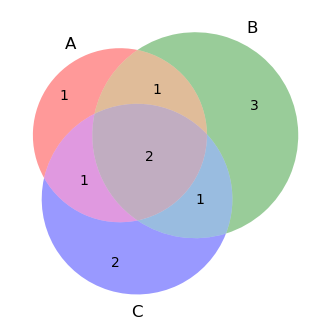

In [2]:
import matplotlib_venn as venn
from matplotlib.pyplot import subplots

# Define conjuntos
A = {'a', 'b', 'c', 'd', 'e'}
B = {'a', 'd', 'e', 'f', 'g', 'm', 'n'}
C = {'c', 'd', 'e', 'f', 'h', 'i'}

# Abre figura
fig, ax = subplots(figsize=(6,4))

# Plota diagrama de Venn
venn.venn3(subsets = [A, B, C], set_labels = ('A', 'B', 'C'), ax = ax);


Observe que o diagrama de Venn não escreve automaticamente os elementos em cada conjunto, mas expressa a cardinalidade deles.

É possível especificar conjuntos por ordem usando tuplas ou dicionários.

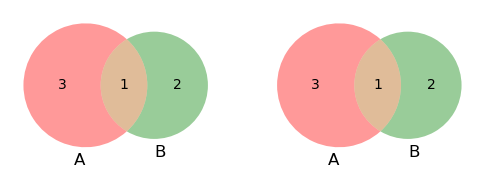

In [3]:
# Abre figura
fig, ax = subplots(1, 2, figsize=(6,4))


# Diagramas de Venn por especificação de ordem
# 10: somente A; 01: somente B; 11: A ∩ B 
venn.venn2(subsets = (3, 2, 1), ax=ax[0])
venn.venn2(subsets = {"10":3, "01": 2, "11": 1}, ax=ax[1]);

## Operações algébricas

As operações definidas na álgebra de conjuntos são análogas às operações lógicas ($\wedge$, $\vee$, $\neg$), mas aplicadas a conjuntos. A tabela abaixo resume as  operações que trataremos para dois conjuntos $A$ e $B$, pertencentes ao conjunto universo $U$.

|Operação|Notação matemática|Definição (em palavras)|
|---|---|---|
|União|$A \cup B$|Todos os elementos que estão em $A$ ou em $B$ (ou nos dois)|
|Interseção|$A \cap B$|Elementos que estão ao mesmo tempo em $A$ e em $B$|
Diferença (ou complementar relativo)|$A \backslash B$ ou $A − B$|Elementos que estão em $A$ mas não em $B$|
|Complementar absoluto|$A^C$ ou $\bar{A}$|Todos os elementos do conjunto universo $U$ que não estão em $A$|
|Diferença simétrica|$A \, \triangle \, B$ ou $A \oplus B$|Elementos que estão em $A$ ou em $B$, mas não nos dois|
|Produto cartesiano|$A \times B$|Todos os pares ordenados $(a,b)$ com $a \in A$ e $b \in B$|

### União de conjuntos

Considere os seguintes conjuntos:

In [4]:
A = {1,2,3}
B = {3,4,5}
C = {6}

In [5]:
A.union(B) # união

{1, 2, 3, 4, 5}

In [6]:
A | B # união com operador alternativo ('ou')

{1, 2, 3, 4, 5}

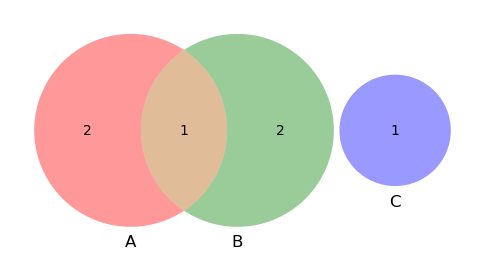

In [7]:
# Representação gráfica
fig, ax = subplots(figsize=(6,4))
venn.venn3(subsets = [A, B, C], set_labels = ('A', 'B', 'C'), ax = ax);

#### Atualização de conjuntos por união

A união *in-place* de dois conjuntos pode ser feita com `update`.

In [8]:
C

{6}

In [9]:
C.update(B) # C é atualizado com elementos de B
C

{3, 4, 5, 6}

In [10]:
C.union(A) # conjunto união com A

{1, 2, 3, 4, 5, 6}

In [11]:
C # os elementos de A não foram atualizados em C

{3, 4, 5, 6}

A atualização da união possui a seguinte forma alternativa com `|=`.

In [12]:
C |= A # elementos de A atualizados em C
C

{1, 2, 3, 4, 5, 6}

### Interseção de conjuntos

In [13]:
A.intersection(B) # interseção

{3}

In [14]:
A & B # interseção com operador alternativo ('e')

{3}

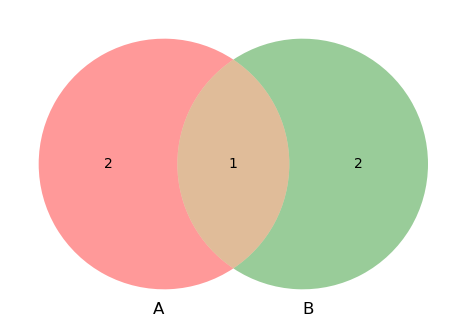

In [15]:
fig, ax = subplots(figsize=(6,4))
venn.venn2(subsets = [A, B], set_labels = ('A', 'B'), ax = ax);

#### Atualização de conjuntos por interseção

A interseção *in-place* de dois conjuntos pode ser feita com `intersection_update`.

In [16]:
D = {1, 2, 3, 4}
E = {2, 3, 4, 5}

In [17]:
D.intersection(E) # interseço com E

{2, 3, 4}

In [18]:
D # D inalterado

{1, 2, 3, 4}

In [19]:
D.intersection_update(E) 
D # D alterado

{2, 3, 4}

A atualização da interseção possui a seguinte forma alternativa com `&=`.

In [20]:
D &= E
D

{2, 3, 4}

### Diferença entre conjuntos

In [21]:
A

{1, 2, 3}

In [22]:
D

{2, 3, 4}

In [23]:
A.difference(D) # apenas elementos de A

{1}

In [24]:
D.difference(A) # apenas elementos de D

{4}

In [25]:
A - D # operador alternativo 

{1}

In [26]:
D - A 

{4}

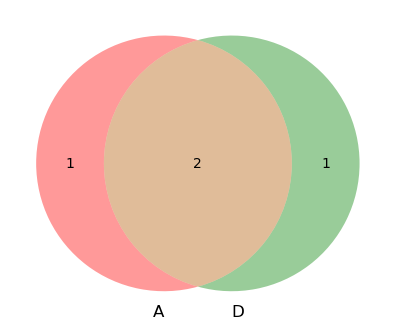

In [27]:
fig, ax = subplots(figsize=(6,4))
venn.venn2(subsets = [A, D], set_labels = ('A', 'D'), ax = ax);

#### Complementar absoluto

Aplicável da mesma forma que a diferença, considerando um conjunto universo.

In [28]:
U = set(range(1, 11)) # universo

Ac = U - {1,2,5,9} # complemento de A
Ac

{3, 4, 6, 7, 8, 10}

#### Atualização de conjuntos por diferença

A interseção *in-place* de dois conjuntos pode ser feita com `difference_update`.

In [29]:
D = {1, 2, 3, 4}
E = {1, 2, 3, 5}

In [30]:
D

{1, 2, 3, 4}

In [31]:
D.difference(E)
D

{1, 2, 3, 4}

In [32]:
D.difference_update(E)
D

{4}

A atualizaço da diferença possui a seguinte forma alternativa com `-=`.

In [33]:
D -= E
D

{4}

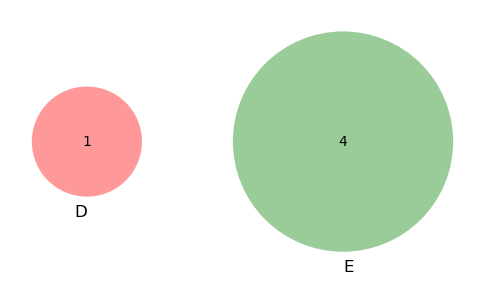

In [34]:
fig, ax = subplots(figsize=(6,4))
venn.venn2(subsets = [D, E], set_labels = ('D', 'E'), ax = ax);

### Adição ou remoção de elementos

In [35]:
A

{1, 2, 3}

In [36]:
A.add(4) # adiciona 4 a A
A

{1, 2, 3, 4}

In [37]:
B

{3, 4, 5}

In [38]:
B.remove(3) # remove 3 de B
B

{4, 5}

### Reinicialização de um conjunto (vazio)

Podemos remover todos os elementos de um conjunto com `clear`, deixando-o em um estado vazio.

In [39]:
A

{1, 2, 3, 4}

In [40]:
A.clear()
A # A é vazio

set()

In [41]:
len(A) # 0 elementos

0

### Diferença simétrica

A diferença simétrica entre dois conjuntos $A$ e $B$ é dada pela união dos complementares relativos: 

$$A \triangle B = A\backslash B \cup B\backslash A$$

Logo, em $A \triangle B$ estarão todos os elementos que pertencem a $A$ ou a $B$ mas não aqueles que são comuns a ambos.

In [42]:
G = {1,2,3,4}
H = {3,4,5,6}

In [43]:
G.symmetric_difference(H) # {3,4} ficam de fora, pois são interseço

{1, 2, 5, 6}

In [44]:
G ^ H # operador alternativo

{1, 2, 5, 6}

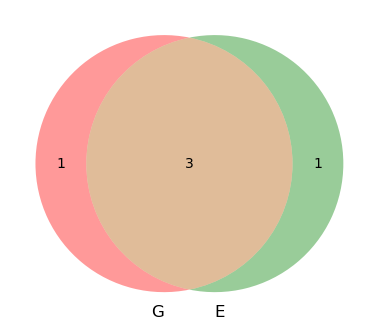

In [45]:
fig, ax = subplots(figsize=(6,4))
venn.venn2(subsets = [G, E], set_labels = ('G', 'E'), ax = ax);

#### Atualização de conjuntos por diferença simétrica

A diferença simétrica *in-place* de dois conjuntos pode ser feita com `symmetric_difference_update`.

In [46]:
G

{1, 2, 3, 4}

In [47]:
G.symmetric_difference_update(H)
G # alterado

{1, 2, 5, 6}

In [48]:
G ^= H # operador alternativo
G

{1, 2, 3, 4}

### Testes de continência e disjunção

Podemos verificar se um conjunto $A$ é subconjunto de (estÃ¡ contido em) outro conjunto $B$ ($A \subseteq B$) ou se $B$ é um superconjunto para (contém) $A$ ($B \supseteq A$) com `issubset` e  `issuperset`. 

In [49]:
B

{4, 5}

In [50]:
C

{1, 2, 3, 4, 5, 6}

In [51]:
B.issubset(C) # B estÃ¡ contido em C

True

In [52]:
C.issuperset(B) # C contém B

True

Dois conjuntos são disjuntos se sua interseção é vazia. Podemos verificar a disjunção com `isdisjoint`

In [53]:
E

{1, 2, 3, 5}

In [54]:
G

{1, 2, 3, 4}

In [55]:
E.isdisjoint(G) # 1,2,5 são comuns

False

In [56]:
D

{4}

In [57]:
E.isdisjoint(D)

True

In [58]:
A

set()

In [59]:
E.isdisjoint(A)

True

## Produto cartesiano

O produto cartesiano é um conceito fundamental pois formaliza a construção de relações entre conjuntos – que estudaremos mais à frente no curso. Além disso, é crucial na área de contagem e análise combinatória.

Há várias formas de implementar o produto cartesiano em Python. Abaixo veremos algumas:

- `itertools`

In [60]:
from itertools import product

A = ['a', 'b']
B = [1, 2, 3]
C = ['x', 'y']

# Produto cartesiano de 2 ou mais conjuntos
for item in product(A, B):
    print(item)
    
# transforma em conjunto    
set(product(A, B))

('a', 1)
('a', 2)
('a', 3)
('b', 1)
('b', 2)
('b', 3)


{('a', 1), ('a', 2), ('a', 3), ('b', 1), ('b', 2), ('b', 3)}

In [61]:
for item in product(A, B, C):
    print(item)
    
# transforma em lista
list(product(A, B))    

('a', 1, 'x')
('a', 1, 'y')
('a', 2, 'x')
('a', 2, 'y')
('a', 3, 'x')
('a', 3, 'y')
('b', 1, 'x')
('b', 1, 'y')
('b', 2, 'x')
('b', 2, 'y')
('b', 3, 'x')
('b', 3, 'y')


[('a', 1), ('a', 2), ('a', 3), ('b', 1), ('b', 2), ('b', 3)]

- Compreensão de lista

In [62]:
A = ['maçã', 'banana']
B = ['vermelho', 'amarelo']

[(fruta, cor) for fruta in A for cor in B]

[('maçã', 'vermelho'),
 ('maçã', 'amarelo'),
 ('banana', 'vermelho'),
 ('banana', 'amarelo')]

In [63]:
nomes  = ['Ana', 'Beto']
idades = [10, 12]
cidades = ['SP', 'RJ']

[(nome, idade, cidade)
 for nome in nomes
 for idade in idades
 for cidade in cidades]

[('Ana', 10, 'SP'),
 ('Ana', 10, 'RJ'),
 ('Ana', 12, 'SP'),
 ('Ana', 12, 'RJ'),
 ('Beto', 10, 'SP'),
 ('Beto', 10, 'RJ'),
 ('Beto', 12, 'SP'),
 ('Beto', 12, 'RJ')]

- `zip`

In [64]:
parametros = {
    'cor': ['vermelho', 'azul'],
    'tamanho': ['P', 'M', 'G'],
    'preco': [29.90, 39.90]
}

combinacoes = [
    dict(zip(parametros.keys(), valores))
    for valores in product(*parametros.values())
]

print(combinacoes[:2])

[{'cor': 'vermelho', 'tamanho': 'P', 'preco': 29.9}, {'cor': 'vermelho', 'tamanho': 'P', 'preco': 39.9}]


## Generalizações

Vejamos formas de trabalhar com generalizações:

- da união: $A_1 \cup A_2 \cup \cdots \cup A_n = \bigcup_{i=1}^n A_i$
- da interseção: $A_1 \cap A_2 \cap \cdots \cap A_n = \bigcap_{i=1}^n A_i$


In [65]:
def generalizacao(opt, *conjuntos):
    """Retorna a união ou interseção de múltiplos conjuntos."""
    if not conjuntos:
        return set()
    elif opt == 'or':
        return set().union(*conjuntos)
    elif opt == 'and':
        return set.intersection(*conjuntos)
    else:
        raise ValueError("Opção inválida. Use 'or' para união ou 'and' para interseção.")

In [66]:
# Exemplo
A1 = {1, 2, 3}
A2 = {3, 4, 5}
A3 = {5, 6, 7}
A4 = {9, 10, 11}
A = generalizacao('or',A1, A2, A3, A4)
print(A)

{1, 2, 3, 4, 5, 6, 7, 9, 10, 11}


In [67]:
# Exemplo
A1 = {1, 2, 3}
A2 = {3, 4, 5}
A3 = {5, 3, 7}
A4 = {9, 3, 11}
A = generalizacao('and',A1, A2, A3, A4)
print(A)

{3}


## Partições

Matematicamente, uma partição de um conjunto $A$ é o conjunto $\mathcal{P}(A) = \{A_1, A_2,\ldots, A_k\}$, que satisfaz três condições:

1. _união completa_: $\bigcup_{i=1}^k A_i = A$;
2. _subconjuntos não vazios_: $A_i \neq 0, \ \ \forall i \in \{1,2,\ldots,k\}$; e
3. _disjunção mútua_: $A_i \cap A_j = \emptyset, \ \ \forall i \neq j \in \{1,2,\ldots,k\}$.

A implementação de partições de conjuntos não é uma tarefa tão simples. Em geral, um algoritmo testará combinações possíveis e filtrará os resultados. Entretanto, para conjuntos pequenos (até aproximadamente 10 elementos), podemos utilizar a função `multiset_partitions` do `sympy`.

```{admonition}Partições e os Números de Bell
:class: dropdown

O número de partições de um conjunto com $n$ elementos é dado pelo [_Número de Bell_](https://en.wikipedia.org/wiki/Bell_number), denotado por $B_n$. O crescimento do Número de Bell é extremamente rápido, super-exponencial, com uma fórmula assintótica (para grandes valores de $n$) complexa. Uma forma de descrever seu crescimento é comparando-o com $n!$ (o número de permutações de $n$ elementos) e $2^n$ (o número de subconjuntos de $n$ elementos): 

| $n$ | $2^n$ (Subconjuntos) | $n!$ (Permutações) | $B_n$ (Partições) |
|---|---|---|---|
| 1 | 2 | 1 | 1 |
| 5 | 32 | 120 | 52 |
| 10 | 1.024 | 3.628.800 | 115.975 |
| 15 | 32.768 | $1.3 \times 10^{12}$ | $1.38 \times 10^8$ |

A complexidade de tempo para a geração de partições é dominada pelo número de partições. Como se vê, a implementação de um algoritmo de partição torna-se complexa e inviável para valores grandes 
de $n$ devido ao crescimento super-exponencial de saídas que ele precisa produzir.  Complexidade computacional é um assunto bastante estudado em matemática combinatorial.
```

In [73]:
from sympy.utilities.iterables import multiset_partitions

# Conjunto arbitrário
S = {'Bell', 'Dall', 3, True}

# Partições
for p in multiset_partitions(S):
    print(p)

[['Bell', 'Dall', 3, True]]
[['Bell', 'Dall', 3], [True]]
[['Bell', 'Dall', True], [3]]
[['Bell', 'Dall'], [3, True]]
[['Bell', 'Dall'], [3], [True]]
[['Bell', 3, True], ['Dall']]
[['Bell', 3], ['Dall', True]]
[['Bell', 3], ['Dall'], [True]]
[['Bell', True], ['Dall', 3]]
[['Bell'], ['Dall', 3, True]]
[['Bell'], ['Dall', 3], [True]]
[['Bell', True], ['Dall'], [3]]
[['Bell'], ['Dall', True], [3]]
[['Bell'], ['Dall'], [3, True]]
[['Bell'], ['Dall'], [3], [True]]


## Exercícios aplicados resolvidos

**I**. Considere que você está investigando tentativas de fraude e hackeamento em um sistema com quatro tipos de acesso: administradores, _back-end_, _front-end_ e _devOPs_ externo. Cada nível é acessado por um conjunto específico de senhas. Entretanto, existem grupos de pessoas com acesso multinível. No sistema existe um _log_ com os registros de acesso capaz de descriptografar as senhas tentadas por usuários. Sua missão é varrer o _log_ e criar um relatório de senhas comuns e identificar vulnerabilidades do sistema. Em particular, investigue se senhas aleatórias de ataque (`FAIL`) são comuns com um ou mais tipos de acesso.


```
# Conteúdo resumido de '4-passwords.csv'
PASS,ADM,BDN,FRT,DEV,FAIL
#xKC9e,0,0,0,1,0
RaR@N,0,0,0,0,1
i2jz,0,0,0,1,1
!N4@P,1,0,0,1,1
5n3wC,0,0,1,0,0
8eqRq,0,1,1,0,1
1#qvFB,1,0,0,0,1
```

### Resolução

In [69]:
import pandas as pd
from itertools import product

# lê arquivo de senhas
df_pass = pd.read_csv("../examples/4-passwords.csv")

# define grupos de senhas
passwd = {}
pass_types = df_pass.columns[1:]
#print(pass_types)
 
for pass_type in pass_types:
    passwd[f"{pass_type}"] = set(df_pass[df_pass[pass_type] == 1]['PASS'])

# Aplica dois filtros simultaneamente para gerar combinações
# 1. impede pares do tipo (x, x)
# 2. impede pares do tipo (x, y), quando x < y na ordem lexicográfica (alfabética)
pares = [par for par in product(pass_types, repeat=2) if par[0] < par[1]]

# usa produto cartesiano para testar interseções
stats = {}
for par in pares: 
    A_inter_B = passwd[par[0]].intersection(passwd[par[1]])
    stats[f"{par[0]}_inter_{par[1]}"] = (len(A_inter_B), A_inter_B)

# impressão de relatório
print("*"*5 + "  REPORT A & B  " + "*"*5 + "\n")
for key, value in stats.items():
    A, B = key.split("_")[0], key.split("_")[-1]
    if A == "FAIL" or B == "FAIL":
        print(f"A=\'{A}\' B=\'{B}\'")
        print(f"n(common) = {value[0]}")
        print(f"passes = {value[1]}\n")

*****  REPORT A & B  *****

A='ADM' B='FAIL'
n(common) = 35
passes = {'L4DMhs', 'I!QWG', 'jg1yj', 'NqqY', '!N4@P', 'eErd', 'MXdH', 'd@dY', 'Qpq1kh', 'xTbL', 'vN2i', 'J74#', '9bvAZ', 'RDv5', 'r5Vh', 'x61U#w', 'KNksPg', '2!ps', 'WfYoTu', 'csja', 'HNkt', '7uxevZ', '#yv4IK', 'RS4h', 'ZQNNm6', 'TQsLh', 'L#03', '5fRLy', 'Ep8cz', 'gAFx5z', 'OpWv1G', '1#qvFB', 'pU@Z', 'dA6Cqt', 'Ppq!90'}

A='BDN' B='FAIL'
n(common) = 25
passes = {'L4DMhs', 'tsxeZP', 'O6FYAe', 'V0Q!sX', 'gjOqFo', 'T#jg', 'J74#', '9bvAZ', '8eqRq', '!ICsPf', '2ohcY', 'KNksPg', 'zmFwVt', 'LQsIo', 'csja', 'LuhMp', 'g8LOA', '#SShm', '6@Ctee', '#yv4IK', 'RS4h', 'b9fLXD', 'OpWv1G', 'dA6Cqt', 'Ppq!90'}

A='DEV' B='FAIL'
n(common) = 20
passes = {'A84@l', 'i2jz', '!N4@P', 'cKTy20', 'MXdH', 'gc1jc', 'd@dY', 'J74#', '9bvAZ', 'HNvdm', 'HNkt', '7uxevZ', 'DYf1', '#yv4IK', 'XXjB@N', 'PMvq', 'OpWv1G', 'Ppq!90', 'h58o', '8u!d'}

A='FAIL' B='FRT'
n(common) = 20
passes = {'#rkRb@', '95oO', 'gjOqFo', 'CMUt5', 'T#jg', 'er81dP', 'NraO33', 'J74#', '9b

In [70]:
plt.rcdefaults()